<center><img src ="https://media.steampowered.com/apps/csgo/blog/images/fb_image.png?v=6" height=300 width=700></center>

# CS:GO Round Win Predictor


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings(action = 'ignore')

# Display Options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Standard styling options for plots
plt.style.use("ggplot")

In [2]:
# Import data
df = pd.read_csv("data\\csgo_round_snapshots.csv")

df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


## Exploratory Data Analysis

In [3]:
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [4]:
print(f'''There are {len(df.columns) - 1} features or predictors for round winner.
They target variable is round_winner which says whether T or CT won the round.''')

There are 96 features or predictors for round winner.
They target variable is round_winner which says whether T or CT won the round.


In [5]:
df.shape

(122410, 97)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

Checking for `null` values.

In [7]:
df.isnull().sum()

time_left                       0
ct_score                        0
t_score                         0
map                             0
bomb_planted                    0
ct_health                       0
t_health                        0
ct_armor                        0
t_armor                         0
ct_money                        0
t_money                         0
ct_helmets                      0
t_helmets                       0
ct_defuse_kits                  0
ct_players_alive                0
t_players_alive                 0
ct_weapon_ak47                  0
t_weapon_ak47                   0
ct_weapon_aug                   0
t_weapon_aug                    0
ct_weapon_awp                   0
t_weapon_awp                    0
ct_weapon_bizon                 0
t_weapon_bizon                  0
ct_weapon_cz75auto              0
t_weapon_cz75auto               0
ct_weapon_elite                 0
t_weapon_elite                  0
ct_weapon_famas                 0
t_weapon_famas

No null values present.

In [8]:
df['round_winner'].value_counts()

round_winner
T     62406
CT    60004
Name: count, dtype: int64

Almost a balanced dataset. I will explore later which maps are more one sided i.e. CT or T sided.

Searching `duplicate` rows

In [9]:
df.duplicated().sum()

4962

I will remove the duplicate rows.

In [10]:
df.drop_duplicates(keep='first', inplace=True)

#### Feature: `map`

In [11]:
df['map'].value_counts()

map
de_inferno     22982
de_dust2       21252
de_nuke        18078
de_mirage      17793
de_overpass    13474
de_train       12919
de_vertigo     10805
de_cache         145
Name: count, dtype: int64

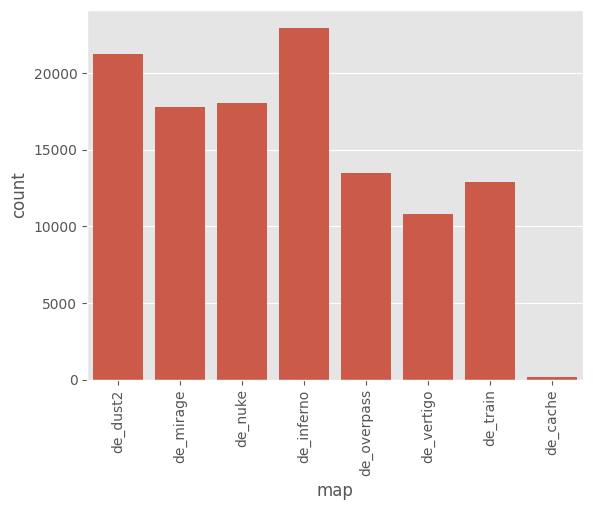

In [12]:
sns.countplot(data=df, x="map")
plt.xticks(rotation=90)
plt.show()

#### Feature: `bomb_planted `

In [13]:
df['bomb_planted'].value_counts()

bomb_planted
False    103764
True      13684
Name: count, dtype: int64

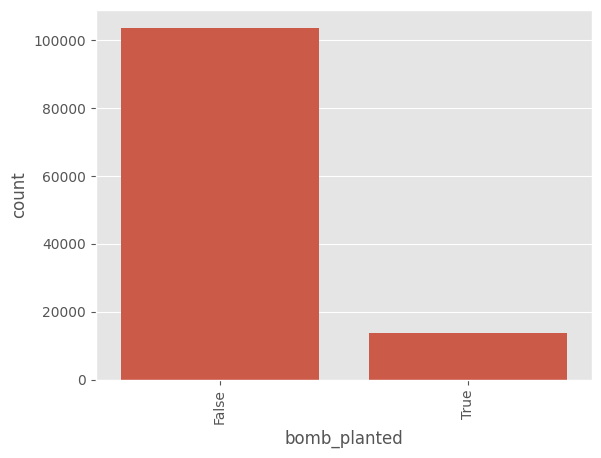

In [14]:
sns.countplot(data=df, x="bomb_planted")
plt.xticks(rotation=90)
plt.show()

Round winner based on whether bomb was planted:

In [15]:
round_winner_pivot = pd.pivot_table(df, 
                                    index='bomb_planted', 
                                    columns='round_winner', 
                                    aggfunc='size', 
                                    fill_value=0)

round_winner_percentage = round(round_winner_pivot.apply(lambda row: row / row.sum() * 100, axis=1), 2)

round_winner_percentage

round_winner,CT,T
bomb_planted,,
False,52.43,47.57
True,22.65,77.35


When bomb is not planted, there is an equal possibility of any team winning but when its planted, T side is heavily preferred to win.

<Axes: xlabel='bomb_planted', ylabel='count'>

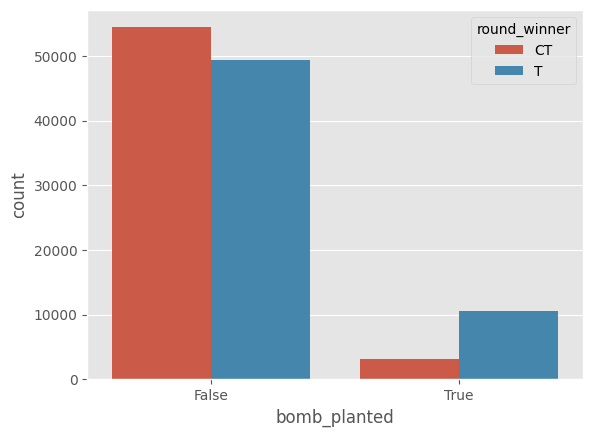

In [16]:
sns.countplot(data = df, x="bomb_planted", hue="round_winner")

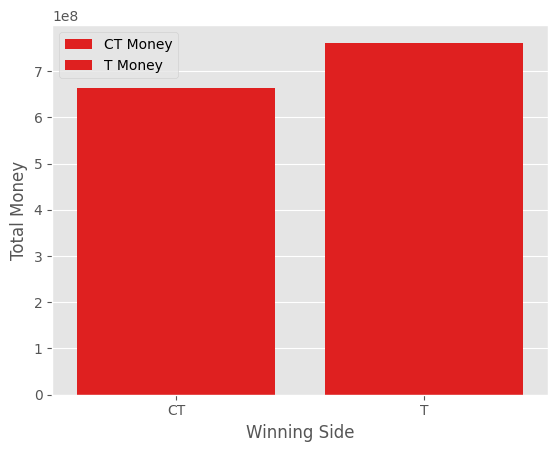

In [17]:
sns.barplot(x='round_winner', y='ct_money', data=df, estimator=sum, ci=None, color='red', label='CT Money')
sns.barplot(x='round_winner', y='t_money', data=df, estimator=sum, ci=None, color='red', label='T Money')
plt.xlabel('Winning Side')
plt.ylabel('Total Money')
plt.legend()
plt.show()

#### Target: `round_winner`

In [18]:
df['round_winner'].value_counts()

round_winner
T     59941
CT    57507
Name: count, dtype: int64

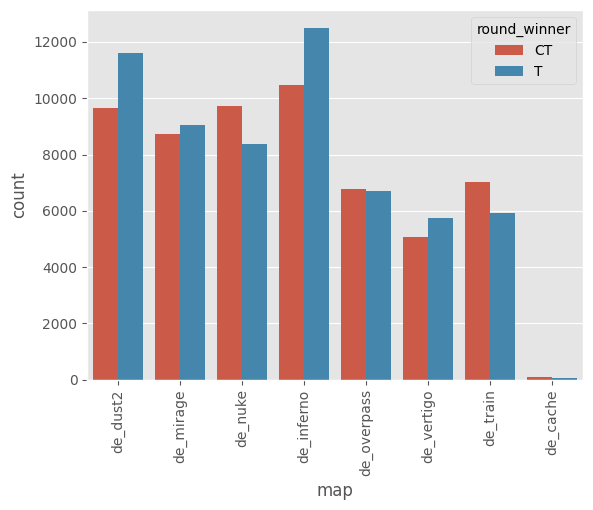

In [19]:
sns.countplot(data=df, x="map", hue="round_winner")
plt.xticks(rotation=90)
plt.show()

In [20]:
map_team_pivot = pd.pivot_table(df, index='map', columns='round_winner', aggfunc='size', fill_value=0)

map_team_pivot

round_winner,CT,T
map,,
de_cache,103,42
de_dust2,9649,11603
de_inferno,10471,12511
de_mirage,8736,9057
de_nuke,9710,8368
de_overpass,6760,6714
de_train,7007,5912
de_vertigo,5071,5734


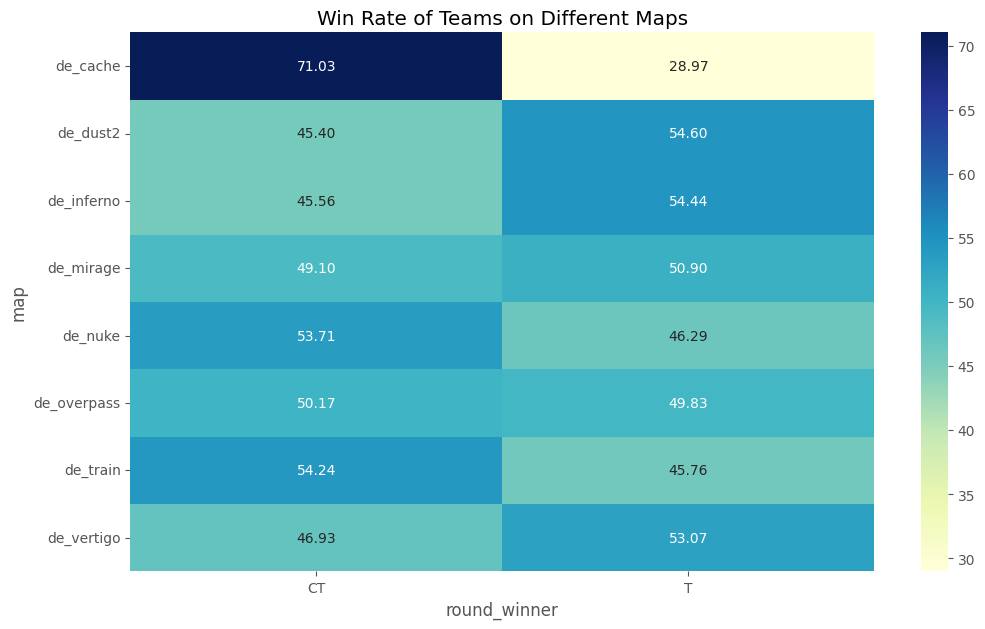

In [21]:
map_team_pivot_normalized = map_team_pivot.div(map_team_pivot.sum(axis=1), axis=0)

plt.figure(figsize=(12, 7))
sns.heatmap(map_team_pivot_normalized * 100, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Win Rate of Teams on Different Maps')
plt.show()

* **Nuke**, **Train** and **Cache** seems a bit CT sided.
* **Dust 2**, **Inferno** and **Vertigo** seems a bit T sided.
* **Mirage** and **Overpass** are very balanced.

#### Now lets see if side with more money has more probability of winning the round.

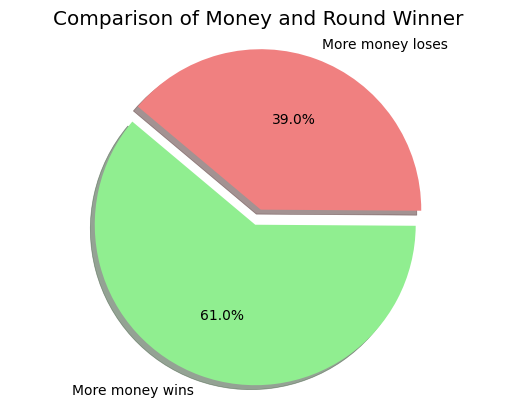

In [22]:
money_compare = np.where(df['ct_money'] > df['t_money'], 'CT', 'T')
round_winner = np.array(df['round_winner'])

# Compare the elements of both arrays
equal_values = (money_compare == round_winner)

# Count the number of True and False values
true_count = sum(equal_values)
false_count = len(equal_values) - true_count

# Data for the pie chart
labels = ['More money wins', 'More money loses']
sizes = [true_count, false_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Comparison of Money and Round Winner")
plt.show()

Looks like side with more money is more probable to win the round. This information is not so relevant because the data snapshots are taken in-between the rounds, not in the buy phase (before round start) which determines what weapons can they afford for the round. 

#### Lets understand the distribution of `guns` and `throwables` across both sides

In [23]:
print(dict(enumerate(df.columns)))

{0: 'time_left', 1: 'ct_score', 2: 't_score', 3: 'map', 4: 'bomb_planted', 5: 'ct_health', 6: 't_health', 7: 'ct_armor', 8: 't_armor', 9: 'ct_money', 10: 't_money', 11: 'ct_helmets', 12: 't_helmets', 13: 'ct_defuse_kits', 14: 'ct_players_alive', 15: 't_players_alive', 16: 'ct_weapon_ak47', 17: 't_weapon_ak47', 18: 'ct_weapon_aug', 19: 't_weapon_aug', 20: 'ct_weapon_awp', 21: 't_weapon_awp', 22: 'ct_weapon_bizon', 23: 't_weapon_bizon', 24: 'ct_weapon_cz75auto', 25: 't_weapon_cz75auto', 26: 'ct_weapon_elite', 27: 't_weapon_elite', 28: 'ct_weapon_famas', 29: 't_weapon_famas', 30: 'ct_weapon_g3sg1', 31: 't_weapon_g3sg1', 32: 'ct_weapon_galilar', 33: 't_weapon_galilar', 34: 'ct_weapon_glock', 35: 't_weapon_glock', 36: 'ct_weapon_m249', 37: 't_weapon_m249', 38: 'ct_weapon_m4a1s', 39: 't_weapon_m4a1s', 40: 'ct_weapon_m4a4', 41: 't_weapon_m4a4', 42: 'ct_weapon_mac10', 43: 't_weapon_mac10', 44: 'ct_weapon_mag7', 45: 't_weapon_mag7', 46: 'ct_weapon_mp5sd', 47: 't_weapon_mp5sd', 48: 'ct_weapon_mp

In [24]:
gun_list = list(df.iloc[:, 16:84].columns)
nade_list = list(df.iloc[:, 84:96].columns)

In [25]:
print(gun_list)

['ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug', 'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon', 'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite', 't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas', 'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar', 't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock', 'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s', 'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10', 'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd', 'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9', 'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova', 'ct_weapon_p90', 't_weapon_p90', 'ct_weapon_r8revolver', 't_weapon_r8revolver', 'ct_weapon_sawedoff', 't_weapon_sawedoff', 'ct_weapon_scar20', 't_weapon_scar20', 'ct_weapon_sg553', 't_weapon_sg553', 'ct_weapon_ssg08', 't_weapon_ssg08', 'ct_weapon_ump45', 't_weapon_ump45', 'c

In [26]:
gun_list = set([weapon.split('_')[2] for weapon in gun_list])
gun_list = list(gun_list)
gun_list.sort()
print(gun_list)

['ak47', 'aug', 'awp', 'bizon', 'cz75auto', 'deagle', 'elite', 'famas', 'fiveseven', 'g3sg1', 'galilar', 'glock', 'm249', 'm4a1s', 'm4a4', 'mac10', 'mag7', 'mp5sd', 'mp7', 'mp9', 'negev', 'nova', 'p2000', 'p250', 'p90', 'r8revolver', 'sawedoff', 'scar20', 'sg553', 'ssg08', 'tec9', 'ump45', 'usps', 'xm1014']


In [27]:
nade_list = set([weapon.split('_')[2] for weapon in nade_list])
nade_list = list(nade_list)
nade_list.sort()
print(nade_list)

['decoygrenade', 'flashbang', 'hegrenade', 'incendiarygrenade', 'molotovgrenade', 'smokegrenade']


In [28]:
import re

gun_df = pd.DataFrame(columns=["Number of times used"])

for _ in gun_list:
    gun_df.loc[_] = np.sum(df[df.columns[df.columns.str.contains(_, flags=re.I, regex=True)]].sum())

gun_df.sort_values(by="Number of times used", ascending=False, inplace=True)
gun_df

,Number of times used
glock,383740.0
usps,381777.0
ak47,184390.0
m4a4,136971.0
sg553,129151.0
awp,108641.0
deagle,100007.0
p250,62807.0
cz75auto,31251.0
p2000,20658.0


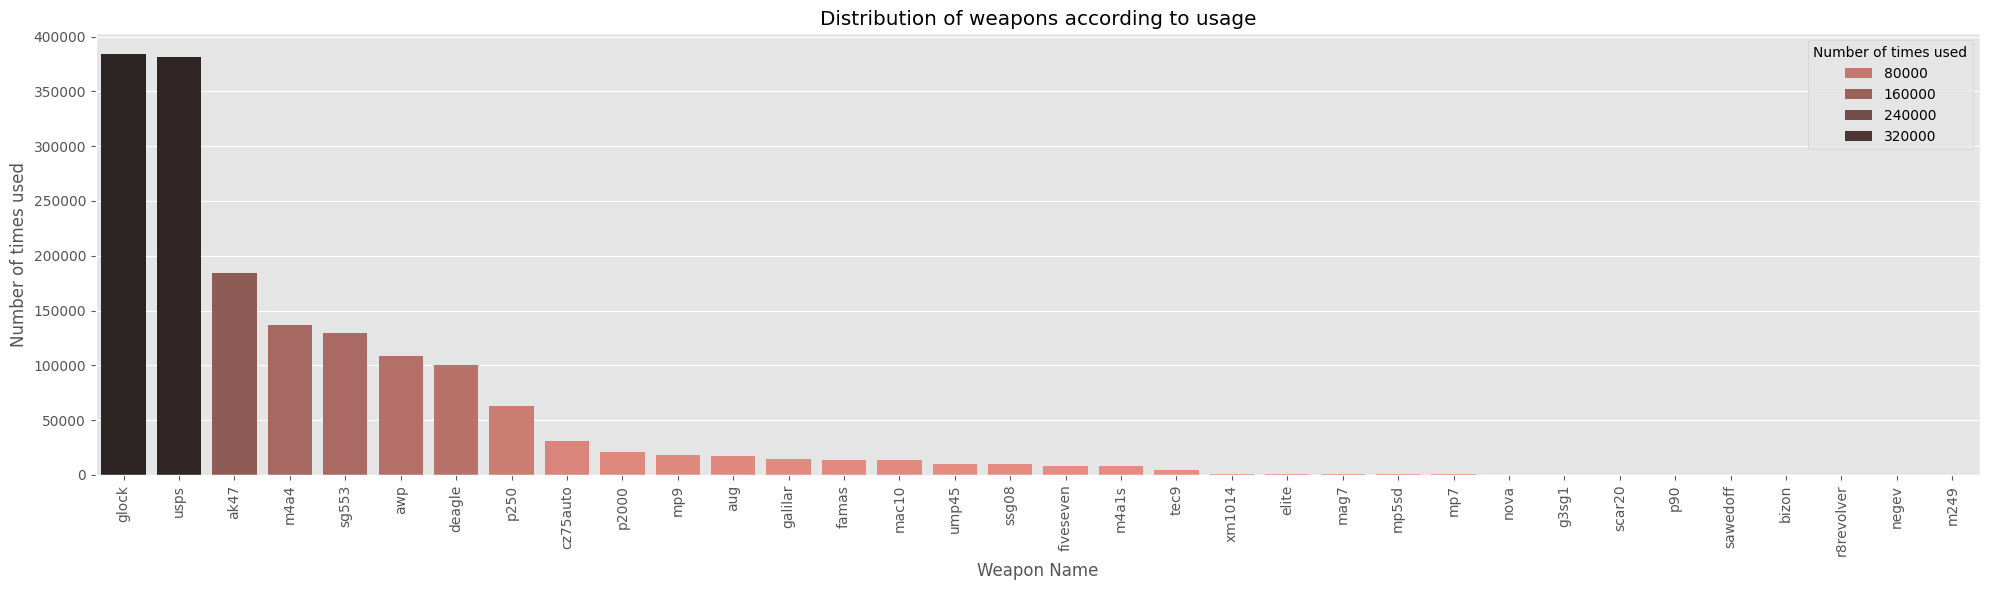

In [29]:
plt.figure(figsize=(20,6))
sns.barplot(data=gun_df, x=gun_df.index, y="Number of times used", hue="Number of times used", palette="dark:salmon_r")
plt.title("Distribution of weapons according to usage")
plt.xticks(rotation=90)
plt.xlabel("Weapon Name")
plt.tight_layout()
plt.show()

<p>The prevalence of weapons in this list can be analyzed to highlight the popularity and strategic choices of players in the game. The Glock and USP-S stand out as the most common weapons, as they are the default pistols for Terrorists (T) and Counter-Terrorists (CT) respectively, requiring no additional purchase. Following closely are the AK-47, renowned for its power and effectiveness on the T side, and the M4A4, serving as the primary rifle choice for CTs.</p>

<p>Interestingly, the SG553 garners more usage than the AWP, despite the latter being the pinnacle sniper rifle in the game. Even though the SG553 comes at a higher price point than the AK-47, players still opt for its versatility and capabilities. From game-play knowledge I can confirm that this data was taken during the "Krieg meta", Krieg being the popular nickname of the SG553.</p>

In [30]:
nade_df = pd.DataFrame(columns=["Number of times used"])

for _ in nade_list:
    nade_df.loc[_] = np.sum(df[df.columns[df.columns.str.contains(_, flags=re.I, regex=True)]].sum())

nade_df.sort_values(by="Number of times used", ascending=False, inplace=True)
nade_df

,Number of times used
flashbang,446344.0
smokegrenade,382277.0
molotovgrenade,168638.0
hegrenade,160497.0
incendiarygrenade,122933.0
decoygrenade,6202.0


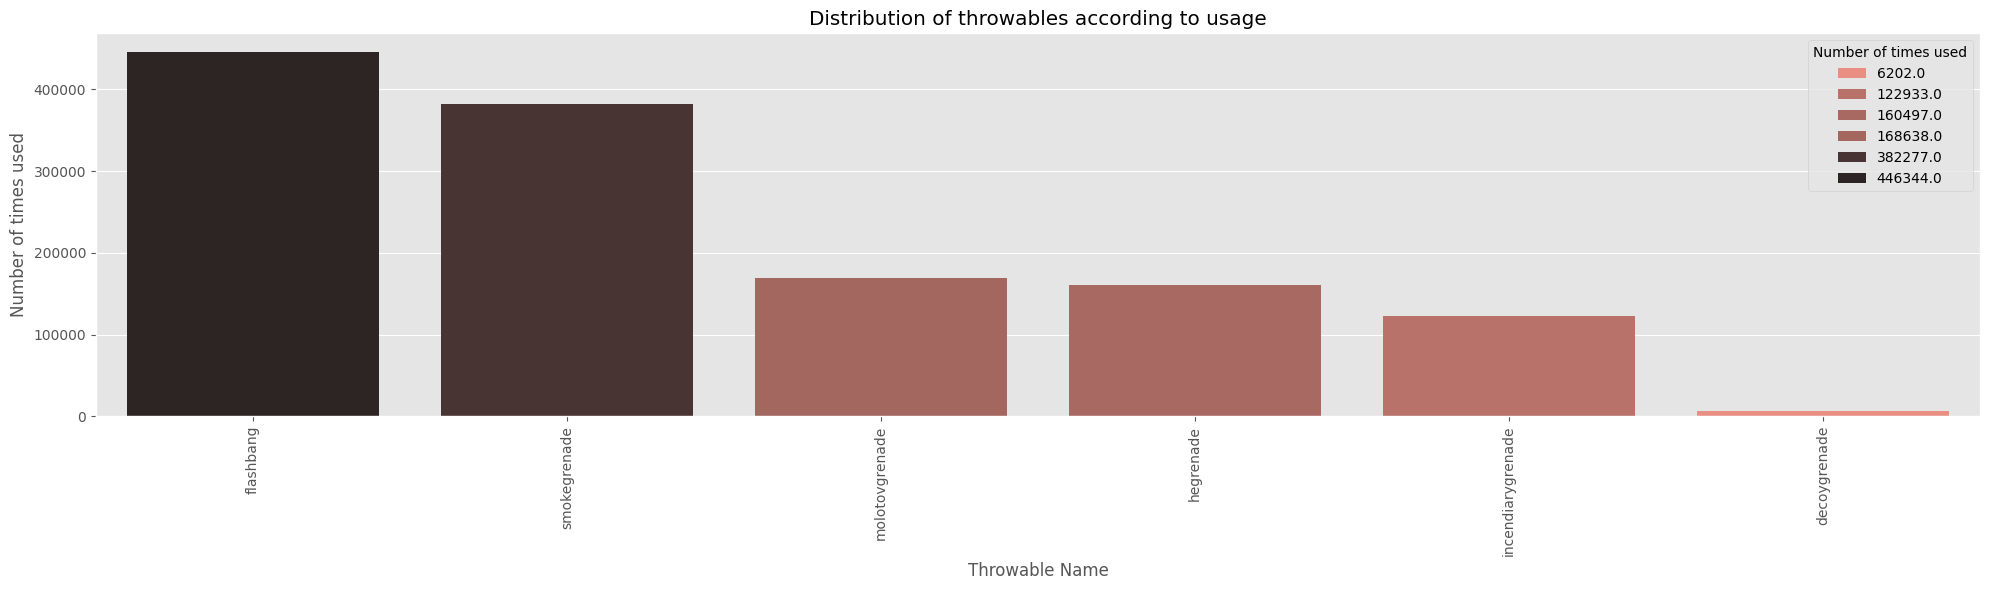

In [31]:
plt.figure(figsize=(20,6))
sns.barplot(data=nade_df, x=nade_df.index, y="Number of times used", hue="Number of times used", palette="dark:salmon_r")
plt.title("Distribution of throwables according to usage")
plt.xticks(rotation=90)
plt.xlabel("Throwable Name")
plt.tight_layout()
plt.show()

### Feature Engineering

At first, I will search which columns need to be encoded and which columns need to be scaled.

In [32]:
cols = list(df.select_dtypes(include="float64").columns)

for _ in cols:
    print("\n\nFeature:", _)
    print(df[_].unique())



Feature: time_left
[175.   156.03  96.03 ...  79.26  53.38   0.24]


Feature: ct_score
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]


Feature: t_score
[ 0.  1.  2.  3.  4. 11. 12. 13. 14. 15.  5.  6.  8.  9. 10.  7. 16. 17.
 18. 19. 20. 21. 23. 22. 24. 26. 27. 28. 29. 30. 25. 31. 32. 33.]


Feature: ct_health
[500. 391. 295. 249. 300. 116. 100. 431. 404. 379. 200. 399. 163.  67.
 400. 298. 307. 473. 454. 371. 338. 476. 376. 432. 389. 109. 320. 184.
  80. 497.  28. 483. 283. 183. 180. 201. 395. 471. 171. 112. 282. 103.
  13. 478. 207. 344. 279. 189. 322. 452.  10.  36. 321. 315. 408. 108.
 257. 416. 288. 263. 188. 491. 281. 181. 153.  71. 429. 229. 129.  29.
 270. 104. 174. 273. 481. 252.  81. 139. 299. 492. 159. 287. 479. 179.
 318.  99. 243. 242. 446. 311. 442. 453. 486. 381. 173. 406. 266.  50.
 360. 196.  73. 142. 276. 455. 458. 361. 125. 498. 470. 205. 223.  30.
 363. 244. 226. 445. 493. 375

In the dataset, most features don't require scaling, while others could potentially benefit from it, enhancing machine learning performance. I am storing these features in separate lists for later optimization.

In [33]:
features_to_be_scaled = ["time_left", "ct_armor", "t_armor", "ct_health", "t_health", "ct_money", "t_money"]

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time_left,117448.0,94.648097,53.224518,0.01,54.91,94.89,114.96,175.0
ct_score,117448.0,6.769566,4.802249,0.00,3.00,6.00,10.00,32.0
t_score,117448.0,6.828775,4.832447,0.00,3.00,6.00,11.00,33.0
ct_health,117448.0,408.522623,133.833268,0.00,336.00,500.00,500.00,500.0
t_health,117448.0,398.658828,141.393442,0.00,309.00,500.00,500.00,600.0
ct_armor,117448.0,317.751064,170.339769,0.00,195.00,382.00,487.00,500.0
t_armor,117448.0,302.562300,174.118608,0.00,179.00,353.00,471.00,500.0
ct_money,117448.0,10000.738625,11308.757451,0.00,1300.00,5900.00,15000.00,80000.0
t_money,117448.0,11492.634613,12245.826779,0.00,1650.00,7650.00,18350.00,80000.0
ct_helmets,117448.0,2.120028,1.831718,0.00,0.00,2.00,4.00,5.0


In [35]:
df.describe(include='O').T

,count,unique,top,freq
map,117448,8,de_inferno,22982
round_winner,117448,2,T,59941


### Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for _ in ["map", "bomb_planted", "round_winner"]:
    df[_] = le.fit_transform(df[_])
    print(f"Labelled classes for feature {_}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

Labelled classes for feature map: {'de_cache': 0, 'de_dust2': 1, 'de_inferno': 2, 'de_mirage': 3, 'de_nuke': 4, 'de_overpass': 5, 'de_train': 6, 'de_vertigo': 7}
Labelled classes for feature bomb_planted: {False: 0, True: 1}
Labelled classes for feature round_winner: {'CT': 0, 'T': 1}


In [37]:
X = df.drop(columns=["round_winner"])
y = df[["round_winner"]]

### Train-Test splitting

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Function to return classification report

In [39]:
def get_classification_report(model, X_test, y_test):
    from sklearn.metrics import classification_report
    """
    Calculate the classification score of a trained model on test data.

    Parameters:
    - model: Trained classification model object.
    - X_test: Test feature data (numpy array or DataFrame).
    - y_test: True labels for the test data (numpy array or Series).

    Returns:
    - score: Classification score of the model on the test data.
    """
    y_pred = model.predict(X_test)
    score = classification_report(y_test, y_pred)
    print(score)

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

get_classification_report(lr, X_test, y_test)

              precision    recall  f1-score   support

           0       0.75      0.71      0.73     17311
           1       0.74      0.78      0.76     17924

    accuracy                           0.74     35235
   macro avg       0.75      0.74      0.74     35235
weighted avg       0.75      0.74      0.74     35235



## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

get_classification_report(rf, X_test, y_test)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86     17311
           1       0.88      0.85      0.87     17924

    accuracy                           0.87     35235
   macro avg       0.87      0.87      0.87     35235
weighted avg       0.87      0.87      0.87     35235



In [42]:
feature_importance = dict(zip(X.columns, np.round(rf.feature_importances_, 4)))

sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

print(sorted_feature_importance)

{'t_armor': 0.0745, 'ct_armor': 0.0729, 't_money': 0.0516, 'ct_money': 0.0504, 't_helmets': 0.0413, 'time_left': 0.0407, 'ct_defuse_kits': 0.0349, 't_health': 0.0341, 'ct_helmets': 0.0308, 't_score': 0.0307, 'ct_score': 0.0303, 'ct_health': 0.0302, 't_weapon_ak47': 0.0292, 'ct_grenade_flashbang': 0.0288, 'map': 0.0257, 't_grenade_flashbang': 0.0223, 't_players_alive': 0.0219, 'ct_grenade_smokegrenade': 0.0203, 'ct_players_alive': 0.0196, 't_weapon_glock': 0.0192, 'ct_weapon_usps': 0.0186, 't_weapon_sg553': 0.0181, 't_grenade_smokegrenade': 0.0173, 'ct_weapon_m4a4': 0.0169, 't_grenade_molotovgrenade': 0.0158, 'ct_weapon_awp': 0.0154, 'ct_grenade_hegrenade': 0.015, 'ct_grenade_incendiarygrenade': 0.0144, 'bomb_planted': 0.0105, 't_grenade_hegrenade': 0.0102, 'ct_weapon_deagle': 0.0093, 't_weapon_deagle': 0.0086, 't_weapon_p250': 0.0084, 'ct_weapon_ak47': 0.0076, 'ct_weapon_sg553': 0.0076, 't_weapon_awp': 0.0075, 'ct_weapon_p2000': 0.0071, 'ct_weapon_p250': 0.0065, 'ct_weapon_aug': 0.0058

Rounding the feature importances to four decimal places is a common practice and can be useful for several reasons since it makes them more readable, reduce noise and focus on the most significant digits.

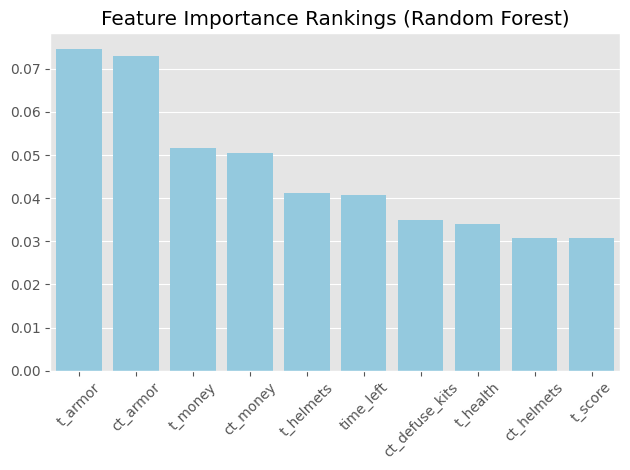

In [43]:
sorted_features = list(sorted_feature_importance.keys())[:10]
sorted_feature_imp = list(sorted_feature_importance.values())[:10]

sns.barplot(x=sorted_features, y=sorted_feature_imp, color='skyblue')
plt.title('Feature Importance Rankings (Random Forest)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## XGBoost

In [44]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

get_classification_report(xgb, X_test, y_test)

              precision    recall  f1-score   support

           0       0.79      0.82      0.81     17311
           1       0.82      0.79      0.81     17924

    accuracy                           0.81     35235
   macro avg       0.81      0.81      0.81     35235
weighted avg       0.81      0.81      0.81     35235



## Linear Discriminant Analysis

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
get_classification_report(lda, X_test, y_test)

              precision    recall  f1-score   support

           0       0.75      0.78      0.76     17311
           1       0.77      0.75      0.76     17924

    accuracy                           0.76     35235
   macro avg       0.76      0.76      0.76     35235
weighted avg       0.76      0.76      0.76     35235



In [46]:
# Get coefficients from the trained model
coefficients = lda.coef_[0]

# Normalize coefficients
coefficients_normalized = np.round(np.abs(coefficients) / np.sum(np.abs(coefficients)), 4)

# Pair features with their importance values
feature_importance = dict(zip(X.columns, coefficients_normalized))

# Sort features by importance values
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))
print(sorted_feature_importance)

{'t_weapon_scar20': 0.1197, 't_weapon_negev': 0.0754, 't_weapon_nova': 0.0705, 'ct_weapon_p90': 0.0592, 't_weapon_sawedoff': 0.0342, 't_weapon_p90': 0.0318, 't_weapon_mag7': 0.0313, 't_weapon_m4a1s': 0.0273, 't_weapon_g3sg1': 0.0253, 'bomb_planted': 0.0244, 't_weapon_r8revolver': 0.0242, 't_weapon_mp5sd': 0.022, 'ct_weapon_nova': 0.0219, 't_weapon_famas': 0.0196, 't_weapon_elite': 0.0184, 't_weapon_awp': 0.0165, 't_weapon_sg553': 0.015, 'ct_weapon_awp': 0.0145, 'ct_weapon_galilar': 0.0144, 't_weapon_ak47': 0.0139, 't_weapon_ump45': 0.0138, 'ct_weapon_mp5sd': 0.0137, 'ct_weapon_aug': 0.0134, 't_weapon_m4a4': 0.0133, 't_weapon_mp9': 0.0131, 'ct_weapon_m4a1s': 0.0122, 't_weapon_aug': 0.0121, 'ct_weapon_m4a4': 0.0118, 'ct_weapon_sg553': 0.0116, 'ct_weapon_famas': 0.0108, 't_weapon_mp7': 0.0105, 'ct_weapon_ssg08': 0.0105, 't_weapon_fiveseven': 0.0103, 'ct_weapon_ak47': 0.0102, 't_weapon_galilar': 0.0101, 't_players_alive': 0.0093, 'ct_weapon_scar20': 0.009, 't_weapon_mac10': 0.0086, 'ct_wea

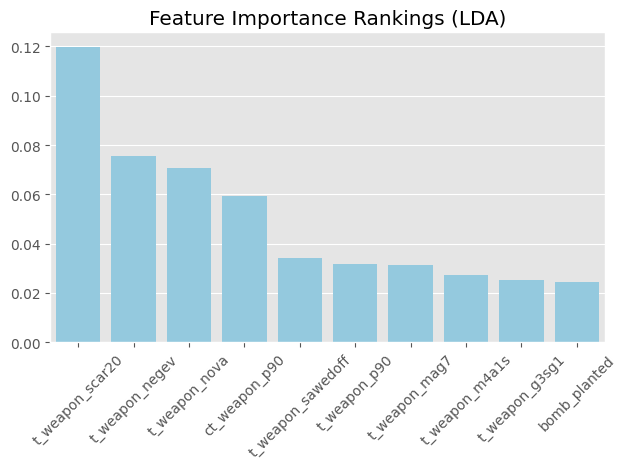

In [47]:
sorted_features = list(sorted_feature_importance.keys())[:10]
sorted_feature_imp = list(sorted_feature_importance.values())[:10]

sns.barplot(x=sorted_features, y=sorted_feature_imp, color='skyblue')
plt.title('Feature Importance Rankings (LDA)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<p>While LDA demonstrates performance superior to Logistic Regression,  its efficacy falls far behind Random Forest. Notably, the feature importance attributed by LDA appears weird, as it assigns the highest importance to weapons Scar20, Negev, and the P90. The results might be interpreted like this: in the rare cases that they were used, the respective side managed to win the round, but the use case being so rare the algorithm thought they were the most important, valuable and impactful weapons in the game. But the descriptive analysis of the distribution of weapons according to usage that I did earlier, shows the opposite results. They were hardly used and, thereby very unpopular among the players.</p>

<p>I could further speculate and say that the above weapons are actually over-powered but the players are not aware about them, but feature importance given by Random Forest guides me towards the believe that LDA is not a suitable algorithm for this case, since the interpretations are erroneous and doesn't match real world use cases.</p>